In [1]:
import pandas as pd
iris = pd.read_csv("https://sololearn.com/uploads/files/iris.csv")
iris.drop("id", axis = 1, inplace=True)
#print(iris.shape)
#print(iris.head())
#print(iris.describe())
print(iris.groupby('species').size()) #or iris['species'].value_counts()

species
iris-setosa        50
iris-versicolor    50
iris-virginica     50
dtype: int64


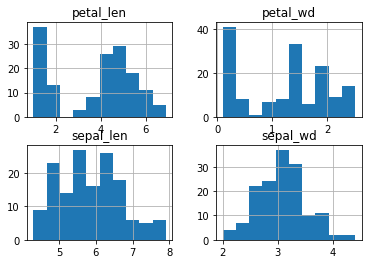

In [2]:
import matplotlib.pyplot as plt
iris.hist()
plt.show()

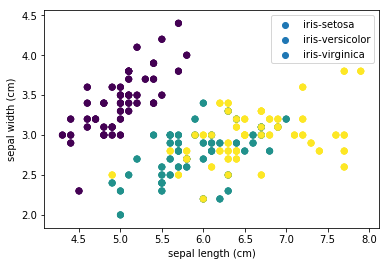

In [7]:
inv_name_dict = {'iris-setosa': 0, 'iris-versicolor': 1, 'iris-virginica': 2}
colors = [inv_name_dict[item] for item in iris['species']]
scatter = plt.scatter(iris['sepal_len'], iris['sepal_wd'], c = colors)
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.legend(labels = inv_name_dict.keys()) #handles = scatter.legend_elements()[0]
plt.savefig('irisscatter.png')
plt.show()

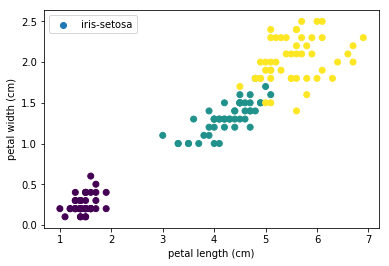

In [14]:
scattr = plt.scatter(iris['petal_len'], iris['petal_wd'], c = colors)
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.legend(labels = inv_name_dict.keys()) #handles = scatter.legend_elements()[0]
plt.show()

In [15]:
from sklearn.model_selection import train_test_split
x = iris[['petal_len', 'petal_wd']]
y = iris['species']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 1, stratify=y)

print(y_train.value_counts())
print(y_test.value_counts())

iris-setosa        35
iris-versicolor    35
iris-virginica     35
Name: species, dtype: int64
iris-versicolor    15
iris-setosa        15
iris-virginica     15
Name: species, dtype: int64


In [17]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
#fit
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [18]:
pred = knn.predict(X_test)
print(pred[:5])

['iris-virginica' 'iris-setosa' 'iris-setosa' 'iris-versicolor'
 'iris-versicolor']


In [19]:
#probability prediction
y_pred_prob = knn.predict_proba(X_test)
print(y_pred_prob[10:12])

[[ 1.   0.   0. ]
 [ 0.   0.2  0.8]]


In [21]:
#Model evaluation
#accuracy
y_pred = knn.predict(X_test)
print((y_pred==y_test.values).sum())
print(y_test.size)

print(knn.score(X_test, y_test))


44
45
0.977777777778


In [22]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[15  0  0]
 [ 0 15  0]
 [ 0  1 14]]


In [23]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(knn, X_test, y_test, cmap=plt.cm.Blues);
plt.show()

ImportError: cannot import name 'plot_confusion_matrix'